In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../data/nyc_data.csv', parse_dates=['pickup_datetime', 'dropoff_datetime'])

In [3]:
pickup=data[['pickup_longitude', 'pickup_latitude']].values
dropoff=data[['dropoff_longitude', 'dropoff_latitude']].values

In [4]:
lon, lat=pickup.T

In [5]:
lon_min, lon_max = (-73.98330, -73.98025)
lat_min, lat_max = ( 40.76724,  40.76871)

In [6]:
in_lon=(lon_min<=lon) & (lon<=lon_max)
in_lon.sum()

69163

In [7]:
in_lat=(lat_min<=lat) & (lat<=lat_max)

In [8]:
in_lonlat=in_lon & in_lat
in_lonlat.sum()

3998

In [9]:
lon1, lat1=dropoff.T

In [10]:
EARTH_R = 6372.8
def geo_distance(lon0, lat0, lon1, lat1):
    lat0 = np.radians(lat0)
    lon0 = np.radians(lon0)
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    dlon = lon0 - lon1
    y = np.sqrt((np.cos(lat1)*np.sin(dlon))**2+(np.cos(lat0)*np.sin(lat1)- np.sin(lat0)*np.cos(lat1)*np.cos(dlon))**2)
    x = np.sin(lat0) * np.sin(lat1) + np.cos(lat0) * np.cos(lat1) * np.cos(dlon)
    c = np.arctan2(y, x)
    return EARTH_R * c

In [11]:
distances=geo_distance(lon, lat, lon1, lat1)
distances

array([0.75953588, 3.59342825, 1.89062515, ..., 3.45517327, 1.23985753,
       5.2165146 ])

Text(0,0.5,'Trips number')

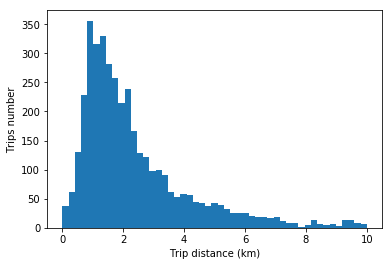

In [12]:
plt.hist(distances[in_lonlat], np.linspace(0,10,50))
plt.xlabel('Trip distance (km)')
plt.ylabel('Trips number')

### density map

In [13]:
evening=(data.pickup_datetime.dt.hour>=19).values
evening

array([False, False, False, ...,  True,  True,  True])

In [14]:
n=evening.sum()

In [15]:
weights=np.zeros(2*n)
weights[:n]=-1 # pickup
weights[n:]=+1 # dropoff

In [16]:
pickup[evening].shape

(242818, 2)

In [17]:
# points=np.r_[pickup[evening], dropoff[evening]]
points=np.concatenate((pickup[evening], dropoff[evening]), axis=0)
points.shape

(485636, 2)

In [18]:
def lat_lon_to_pixels(lat, lon):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lon + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [19]:
lon, lat=points.T
x, y = lat_lon_to_pixels(lat, lon)

In [20]:
lon_min, lat_min = -74.0214, 40.6978
lon_max, lat_max = -73.9524, 40.7982

x_min, y_min = lat_lon_to_pixels(lat_min, lon_min)
x_max, y_max = lat_lon_to_pixels(lat_max, lon_max)

In [21]:
bin = .00003
bins_x = np.arange(x_min, x_max, bin)
bins_y = np.arange(y_min, y_max, bin)

In [22]:
x.shape, y.shape, weights.shape

((485636,), (485636,), (485636,))

In [23]:
grid, _, _=np.histogram2d(y, x, weights=weights, bins=(bins_y, bins_x))

In [24]:
# logistic function to it in order to smooth it(增加对比度)
density=1/(1+np.exp(-grid))

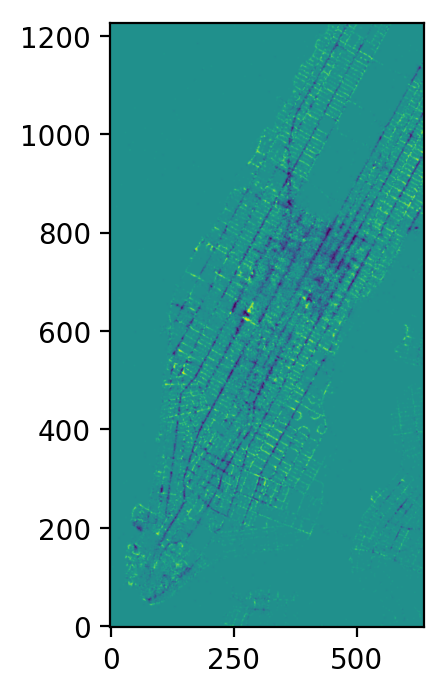

In [25]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=200
plt.imshow(density, origin='lower', interpolation='bicubic')

### coordinate issues

In [26]:
x,y=np.ogrid[0:20,0:10]

In [27]:
# x is first dimension, y is second dimension
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [28]:
y

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [29]:
z=x**2+y**2

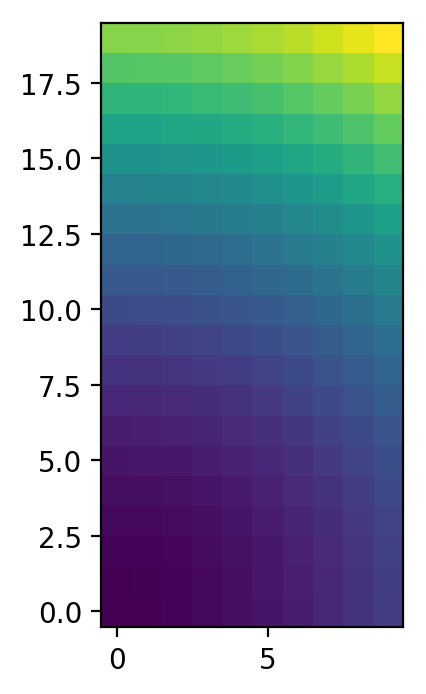

In [30]:
plt.imshow(z, origin='lower')

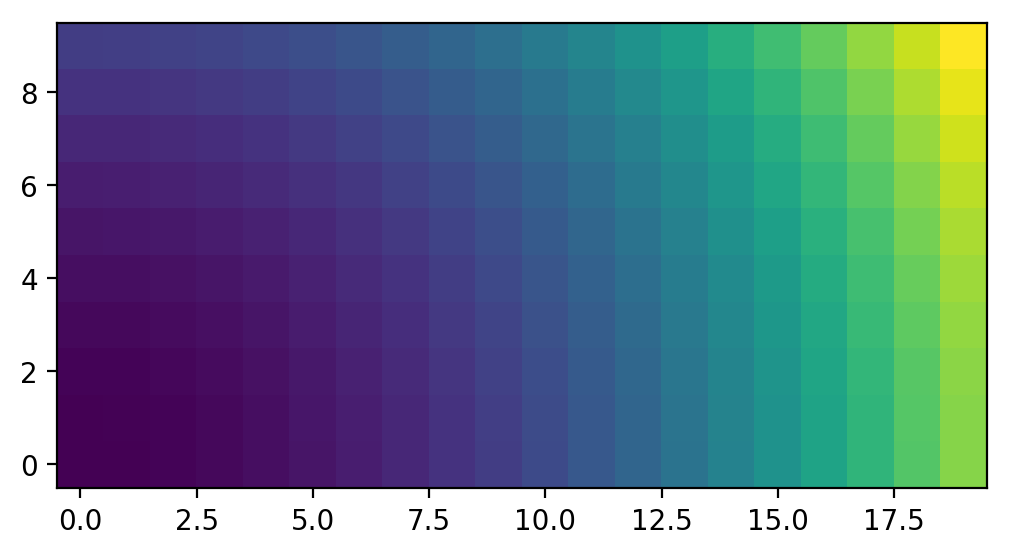

In [31]:
plt.imshow(z.T, origin='lower')